<a href="https://colab.research.google.com/github/mos9z/1lab/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install datasets seaborn

In [5]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Real estate valuation data set.xlsx')
df

,X1_transaction_date,X2_house_age,X3_distance_to _the_nearest_MRT_station,X4_number_of convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


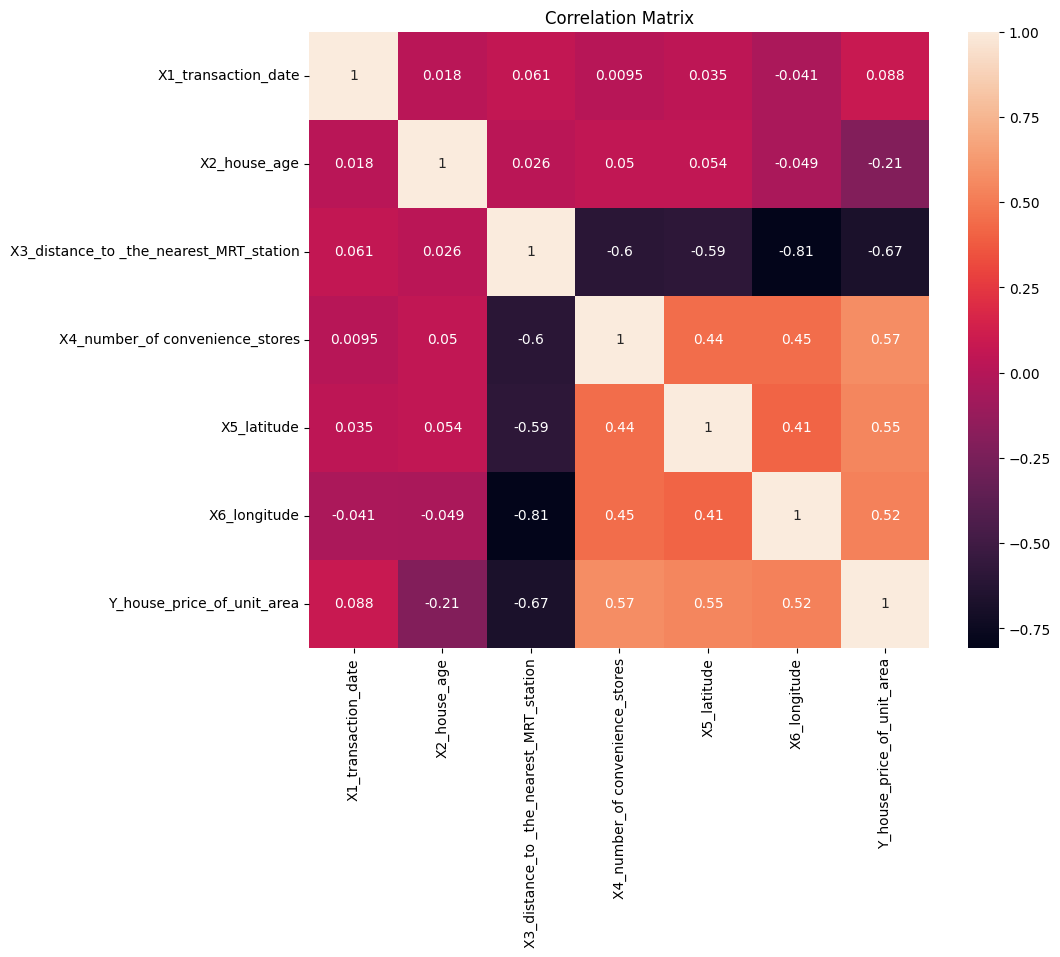

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [8]:
# Пример разделения на обучающую и тестовую выборку
X = df
y = df.Y_house_price_of_unit_area # целевая переменная
X = X.drop('Y_house_price_of_unit_area', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 331 строка на оубчение и 83 строки на валидацию

(192     42.7
 234     23.9
 5       32.1
 45      38.3
 245     40.8
        ...  
 71      40.8
 106     47.1
 270    117.5
 348     53.7
 102     54.4
 Name: Y_house_price_of_unit_area, Length: 331, dtype: float64,
 358    45.1
 350    42.3
 373    52.2
 399    37.3
 369    22.8
        ... 
 31     25.0
 283    23.5
 157    35.6
 203    46.1
 208    26.2
 Name: Y_house_price_of_unit_area, Length: 83, dtype: float64)

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [9]:
df['X4_number_of convenience_stores'] = df['X4_number_of convenience_stores'].astype('category')

In [10]:
df = df.drop('X1_transaction_date', axis=1)

In [11]:
df

,X2_house_age,X3_distance_to _the_nearest_MRT_station,X4_number_of convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


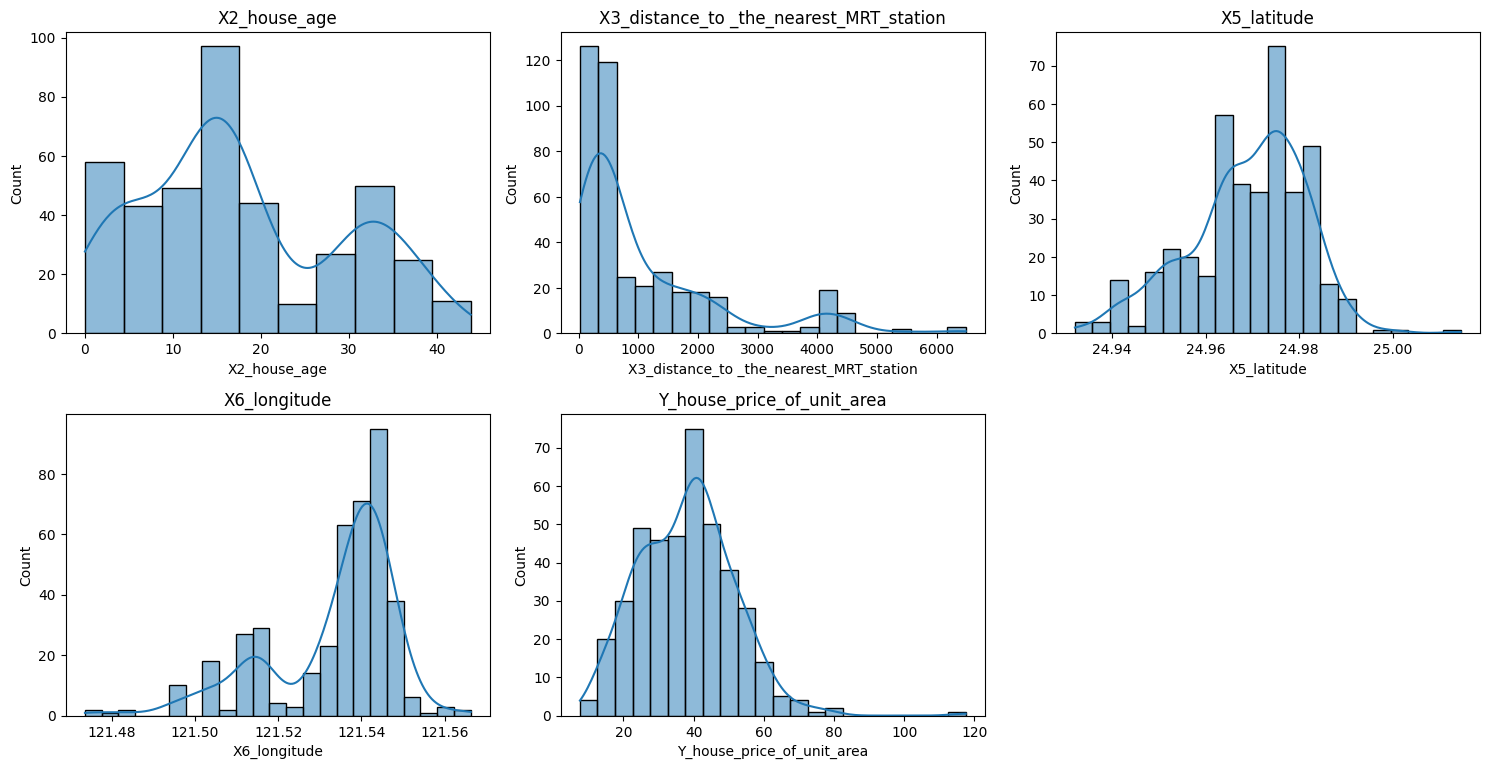

In [12]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

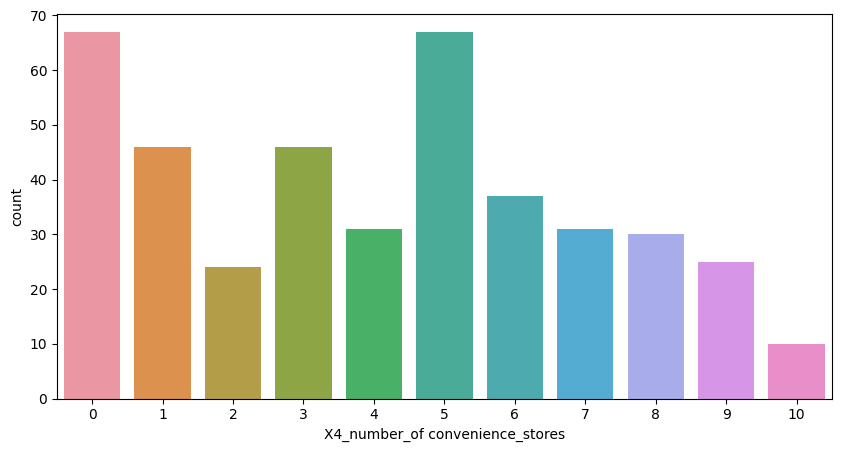

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4_number_of convenience_stores')

plt.show()

<Axes: >

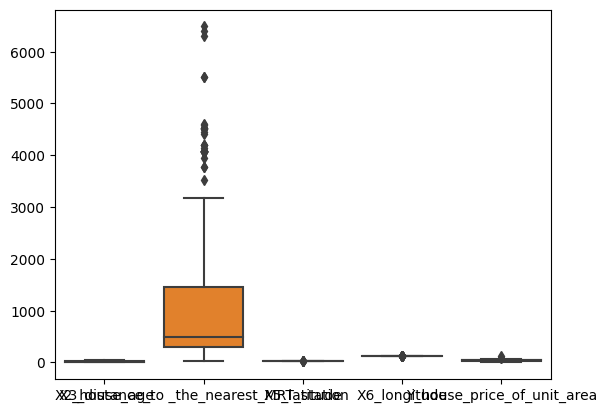

In [14]:
sns.boxplot(data=df)


<Axes: >

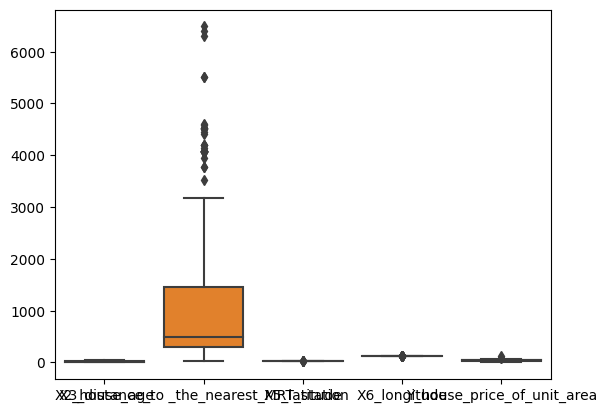

In [15]:
sns.boxplot(data=df)


In [16]:
df.columns

Index(['X2_house_age', 'X3_distance_to _the_nearest_MRT_station',
       'X4_number_of convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   X2_house_age                             414 non-null    float64 
 1   X3_distance_to _the_nearest_MRT_station  414 non-null    float64 
 2   X4_number_of convenience_stores          414 non-null    category
 3   X5_latitude                              414 non-null    float64 
 4   X6_longitude                             414 non-null    float64 
 5   Y_house_price_of_unit_area               414 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 17.1 KB


In [18]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# def transform_dataframe(df):
#     required_columns = ['X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']
#     # Создание копии DataFrame, чтобы не изменять исходный df
#     df_transformed = df.copy()

#     # Преобразование первых четырех признаков с помощью StandardScaler
#     scaler = StandardScaler()
#     scaled_features = scaler.fit_transform(df_transformed[required_columns[:]])

#     # Преобразование 'ph_bins' с помощью pd.get_dummies
#     age_bins_dummies = pd.get_dummies(df_transformed['X2_house_age'], prefix='age')
#     number_of_convenience_stores_bins_dummies = pd.get_dummies(df_transformed['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
#     # Объединение масштабированных признаков и dummy переменных
#     df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:])
#     df_transformed = pd.concat([df_transformed, age_bins_dummies], axis=1)
#     df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)
#     return df_transformed

# df_research = transform_dataframe(df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of convenience_stores', 'X5_latitude', 'X6_longitude']])
# df_research = pd.concat([df_research, df['Y_house_price_of_unit_area'], ], axis=1)


In [20]:
from sklearn.preprocessing import StandardScaler
"""
Код здесь
"""

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['X2_house_age', 'X3_distance_to _the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']])
number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
# Объединение масштабированных признаков и dummy переменных
df_transformed = pd.DataFrame(scaled_features, columns=['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude'])
df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

df_y = df['Y_house_price_of_unit_area'].reset_index()
df_itog = pd.concat([df_transformed,df_y['Y_house_price_of_unit_area'] , ], axis=1)
df_itog

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X5_latitude,X6_longitude,number_of convenience_stores_0,number_of convenience_stores_1,number_of convenience_stores_2,number_of convenience_stores_3,number_of convenience_stores_4,number_of convenience_stores_5,number_of convenience_stores_6,number_of convenience_stores_7,number_of convenience_stores_8,number_of convenience_stores_9,number_of convenience_stores_10,Y_house_price_of_unit_area
0,1.255628,-0.792495,1.125430,0.448762,0,0,0,0,0,0,0,0,0,0,1,37.9
1,0.157086,-0.616612,0.912444,0.401139,0,0,0,0,0,0,0,0,0,1,0,42.2
2,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,47.3
3,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,54.8
4,-1.117223,-0.549997,0.834188,0.592937,0,0,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-2.216993,-1.927835,1,0,0,0,0,0,0,0,0,0,0,15.4
410,-1.064493,-0.788071,0.427579,0.635341,0,0,0,0,0,0,0,0,0,1,0,50.0
411,0.095568,-0.549678,0.822893,0.423972,0,0,0,0,0,0,0,1,0,0,0,40.6
412,-0.844784,-0.776684,-0.184755,0.476814,0,0,0,0,0,1,0,0,0,0,0,52.5


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
df.describe()
df

,X2_house_age,X3_distance_to _the_nearest_MRT_station,X4_number_of convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [25]:
y = df_itog['Y_house_price_of_unit_area']

In [26]:
X = df_itog.drop('Y_house_price_of_unit_area', axis=1)

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }


In [29]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 5.846136159409672,
 'MSE': 78.25071875110135,
 'R2': 0.5839730463380596,
 'mape (reverted - % верно угаданых)': 82.73649925615172,
 'mape (original - % ошибок)': 17.263500743848276}

In [30]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)


{'MAE': 5.183936603211085,
 'MSE': 56.70773525326881,
 'R2': 0.6619705435565693,
 'mape (reverted - % верно угаданых)': 83.82958040551873,
 'mape (original - % ошибок)': 16.170419594481274}

In [31]:
df_itog

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X5_latitude,X6_longitude,number_of convenience_stores_0,number_of convenience_stores_1,number_of convenience_stores_2,number_of convenience_stores_3,number_of convenience_stores_4,number_of convenience_stores_5,number_of convenience_stores_6,number_of convenience_stores_7,number_of convenience_stores_8,number_of convenience_stores_9,number_of convenience_stores_10,Y_house_price_of_unit_area
0,1.255628,-0.792495,1.125430,0.448762,0,0,0,0,0,0,0,0,0,0,1,37.9
1,0.157086,-0.616612,0.912444,0.401139,0,0,0,0,0,0,0,0,0,1,0,42.2
2,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,47.3
3,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,54.8
4,-1.117223,-0.549997,0.834188,0.592937,0,0,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-2.216993,-1.927835,1,0,0,0,0,0,0,0,0,0,0,15.4
410,-1.064493,-0.788071,0.427579,0.635341,0,0,0,0,0,0,0,0,0,1,0,50.0
411,0.095568,-0.549678,0.822893,0.423972,0,0,0,0,0,0,0,1,0,0,0,40.6
412,-0.844784,-0.776684,-0.184755,0.476814,0,0,0,0,0,1,0,0,0,0,0,52.5


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе